In [1]:
from hotelling_law import HotellingLawModel, Hotels, ConsumerState, WorldParams
from random import randint
import numpy as np
import pandas as pd
from copy import copy, deepcopy

In [2]:
N_t = 1000
N_x = 20
N_y = 20
N_hotels = 4
max_initial_price = 50
min_initial_price = 10

world_params = WorldParams(world_shape=(N_x, N_y))
hotels = []
initial_market_share = {}
initial_revenue = {}
for i in range(N_hotels):
    loc = (randint(0, N_x - 1), randint(0, N_y - 1))
    price = randint(min_initial_price, max_initial_price)
    hotel = Hotels(uuid=i,
                   location=loc,
                   price=price)
    hotels.append(hotel)

    initial_market_share[i] = np.nan
    initial_revenue[i] = np.nan


consumers = ConsumerState(np.ones([N_x, N_y]) * np.nan,
                          initial_market_share,
                          initial_revenue)

In [3]:
model = HotellingLawModel(hotels, consumers, world_params)
results = [deepcopy(result) for result in model.run(N_t)]

In [4]:

revenue = [result.market_share.revenue for result in results]

<AxesSubplot:>

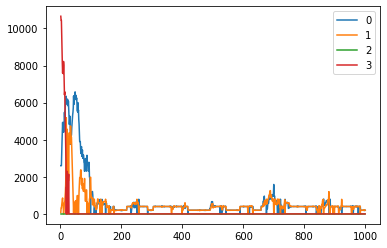

In [5]:
pd.DataFrame(revenue).plot()

<AxesSubplot:>

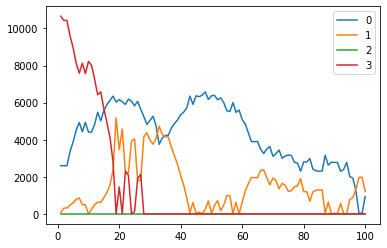

In [8]:
pd.DataFrame(revenue).loc[:100].plot()

<AxesSubplot:>

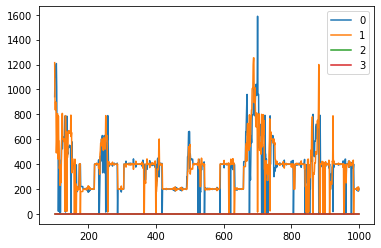

In [9]:
pd.DataFrame(revenue).loc[100:].plot()

consumers[]

<AxesSubplot:>

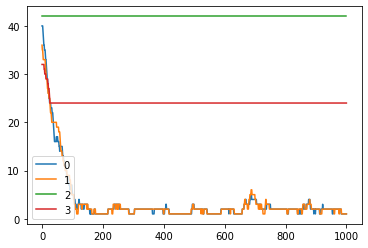

In [6]:
prices = [{hotel.uuid: hotel.price for hotel in result.hotels}
          for result
          in results]

pd.DataFrame(prices).plot()


In [7]:
locations = [{hotel.uuid: hotel.location for hotel in result.hotels}
          for result
          in results]

pd.DataFrame(locations)

,0,1,2,3
0,"(1, 8)","(19, 4)","(17, 12)","(15, 6)"
1,"(1, 8)","[19, 3]","(17, 12)","(15, 6)"
2,"(1, 8)","[19, 3]","(17, 12)","(15, 6)"
3,"[2, 8]","[19, 3]","(17, 12)","(15, 6)"
4,"[2, 9]","[19, 3]","(17, 12)","(15, 6)"
...,...,...,...,...
996,"[10, 10]","[10, 10]","(17, 12)","[15, 7]"
997,"[10, 10]","[10, 10]","(17, 12)","[15, 7]"
998,"[10, 10]","[10, 10]","(17, 12)","[15, 7]"
999,"[9, 10]","[10, 10]","(17, 12)","[15, 7]"
